In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from tqdm import tqdm
sym.init_printing(use_unicode=True)
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# 4

In [4]:
def mulMatrices(m,v):
    r = np.zeros(shape=(len(m),len(v[0])))
    for i in range(len(m)):
        for j in range(len(v[0])):
            for k in range(len(m[0])):
                r[i][j] += m[i][k] * v[k][j]
    return r

m = np.zeros([3,3])
m[0] = np.array([1.,0.,0.])
m[1] = np.array([5.,1.,0.])
m[2] = np.array([-2.,3.,1.])

n = np.zeros([3,3])
n[0] = np.array([4.,-2.,1.])
n[1] = np.array([0.,3.,7.])
n[2] = np.array([0.,0.,2.])

l = mulMatrices(m,n)
l

array([[ 4., -2.,  1.],
       [20., -7., 12.],
       [-8., 13., 21.]])

# 7

In [5]:
def Jacobi(A,b,x0,itmax=1000,tolerancia=1e-14):
    
    x = x0.copy()
    u = x.copy()
    sumk = x.copy()
    
    residuo = np.linalg.norm( np.dot(A,x) - b)
    
    print(residuo)
    
    it = 0
    
    while residuo >= tolerancia and it < itmax:
        
        
        u[:] = 0
        sumk[:] = 0.
        
        for i in range(A.shape[0]):
            for j in range(i-1):
                sumk[i] += A[i,j]*x[j] - A[i,j]*x[j]
        
            u[i] = (b[i] - sumk[i])/A[i,i]
        
        
        x = u.copy()
        

        # Norma infinita
        residuo = np.max(np.abs(np.dot(A,x) - b))
        # Norma griega
        #residuo = np.linalg.norm( np.dot(A,x) - b)
        
        it += 1
        
        if residuo > 1000:
            print('No calculable con Jacobi')
            x[:] = 0.
            break
        
    return x,it

# 11

In [6]:
def power_method( matriz, iterations=10000, tolerancia= 1e-10):

    eigenvector= np.ones(3)
    error=float('inf')
    vector= np.ones(3)
    i=0
    while error> tolerancia and i< iterations:

        matrix_v= (np.dot(matriz, eigenvector))
        eigenvalue= np.dot(eigenvector, matrix_v)
        eigenvector= matrix_v/np.linalg.norm(matrix_v)
        vector= eigenvector* np.linalg.norm(matrix_v)

        if i> 0:
            error= np.abs((eigenvalue- valor)/ valor)

        valor= eigenvalue
        i+=1
    
    return eigenvalue, vector

matrix= np.array([[1,2,-1],[1,0,1],[4,-4,5]])
invmatrix= np.linalg.inv(matrix)

max_eigenvalue,max_eigenvector= power_method(matrix)
max_eigenvector= np.dot(invmatrix, max_eigenvector)
min_eigenvalue,min_eigenvector= power_method(invmatrix)
min_eigenvalue= 1/min_eigenvalue
min_eigenvector= np.dot(matrix, min_eigenvector)


print(matrix)
print("Max eigenvlue", max_eigenvalue)
print("Max eigenvector", max_eigenvector)
print("Min eigenvlue", min_eigenvalue)
print("Min eigenvector", min_eigenvector)

[[ 1  2 -1]
 [ 1  0  1]
 [ 4 -4  5]]
Max eigenvlue 3.0000000004360046
Max eigenvector [-0.23570226  0.23570226  0.94280904]
Min eigenvlue 0.9999999999288576
Min eigenvector [-0.40824829  0.40824829  0.81649658]


# 12

In [7]:
def GetF(G,r):
    
    n = r.shape[0]
    
    v = np.zeros_like(r)
    
    for i in range(n):
        v[i] = G[i](*r)
        
    return v

def GetJacobian(f,r,h=1e-6):
    
    n = r.shape[0]
    
    J = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            
            rf = r.copy()
            rb = r.copy()
            
            rf[j] = rf[j] + h
            rb[j] = rb[j] - h
            
            J[i,j] = ( f[i](*rf) - f[i](*rb)  )/(2*h)
            
    
    return J

def NewtonRaphson(G,r,itmax=1000,error=1e-9):
    
    it = 0
    d = 1.
    dvector = []
    
    while d > error and it < itmax:
        
        # Vector actual
        rc = r
        
        F = GetF(G,rc)
        J = GetJacobian(G,rc)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot(InvJ,F)
        
        diff = r - rc
        
        d = np.max( np.abs(diff) )
        
        dvector.append(d)
        
        it += 1
    

    return r,dvector

In [8]:
G = np.array([lambda x,y,z: 6*x - 2*np.cos(y*z) - 1.,
     lambda x,y,z: 9*y + np.sqrt( x**2 + np.sin(z) + 1.06 ) + 0.9,
     lambda x,y,z: 60*z + 3*np.exp(-x*y)+10*np.pi - 3])

r,dvector = NewtonRaphson(G,np.array([0.,0.,0.]))
r

array([ 0.49814468, -0.1996059 , -0.52882598])

In [9]:
G = np.array([lambda x,y: np.log(x**2+y**2)-np.sin(x*y)-np.log(np.pi)-np.log(2),
     lambda x,y: np.exp(x-y)+np.cos(x*y)])
r,dvector  = NewtonRaphson(G,np.array([2.,2.]))
r

array([1.77245385, 1.77245385])

# 15

In [10]:
O1 = np.array([[0,1],\
                [1,0]])

O2 = np.array([[0,0+-1j],\
                [0+1j,0]])

O3 = np.array([[1,0],\
                [0,-1]])

def conmutar(A,B):
    return np.dot(A,B) - np.dot(B,A)

A = conmutar(O1,O2)
B = conmutar(O1,O3)
C = conmutar(O2,O3)


print(A,"\nEs igual a \n2i*", O3)
print("")
print(B,"\nEs igual a \n2i*", O2)
print("")
print(C,"\nEs igual a \n2i*", O1)

[[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]] 
Es igual a 
2i* [[ 1  0]
 [ 0 -1]]

[[ 0 -2]
 [ 2  0]] 
Es igual a 
2i* [[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

[[0.+0.j 0.+2.j]
 [0.+2.j 0.+0.j]] 
Es igual a 
2i* [[0 1]
 [1 0]]


# 16

In [11]:
gamma0 = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, -1, 0],
                  [0, 0, 0, -1]])

gamma1 = np.array([[0, 0, 0, 1],
                  [0, 0, 1, 0],
                  [0, -1, 0, 0],
                  [-1, 0, 0, 0]])

gamma2 = np.array([[0, 0, 0, -1j],
                  [0, 0, 1j, 0],
                  [0, 1j, 0, 0],
                  [-1j, 0, 0, 0]])

gamma3 = np.array([[0, 0, 1, 0],
                  [0, 0, 0, -1],
                  [-1, 0, 0, 0],
                  [0, 1, 0, 0]])

In [12]:
def anticonmu(A,B):
    return np.dot(A,B) + np.dot(B,A)
print(anticonmu(gamma0,gamma1),anticonmu(gamma0,gamma2),anticonmu(gamma0,gamma3),anticonmu(gamma1,gamma2),anticonmu(gamma1,gamma3),anticonmu(gamma2,gamma3))


[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] [[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]] [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] [[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]] [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] [[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


Consideramos que hay un error en el ejericio, la multiplicacion de todas las matrices da da igaul a una matriz de ceros

# 17

In [13]:
x = sym.Symbol('x', real=True)
y = sym.Symbol('y', real=True)
z = x + sym.I*y


def f(z):
    return z**3 - 1

F = [sym.re(f(z)), sym.im(f(z))]  
F

In [14]:
def GetJacobian(F):
    J = sym.zeros(2,2)
    
    for i in range(2):
        for j in range(2):
            if j==0:
                J[i,j] = sym.diff(F[i],x,1)
            else:
                J[i,j] = sym.diff(F[i],y,1)

    return J

J = GetJacobian(F)
J

⎡   2      2             ⎤
⎢3⋅x  - 3⋅y     -6⋅x⋅y   ⎥
⎢                        ⎥
⎢                2      2⎥
⎣   6⋅x⋅y     3⋅x  - 3⋅y ⎦

In [15]:
invJ = J.inv()
invJ

⎡        2    2                              ⎤
⎢       x  - y                  2⋅x⋅y        ⎥
⎢─────────────────────  ─────────────────────⎥
⎢   4      2  2      4     4      2  2      4⎥
⎢3⋅x  + 6⋅x ⋅y  + 3⋅y   3⋅x  + 6⋅x ⋅y  + 3⋅y ⎥
⎢                                            ⎥
⎢                               2    2       ⎥
⎢       -2⋅x⋅y                 x  - y        ⎥
⎢─────────────────────  ─────────────────────⎥
⎢   4      2  2      4     4      2  2      4⎥
⎣3⋅x  + 6⋅x ⋅y  + 3⋅y   3⋅x  + 6⋅x ⋅y  + 3⋅y ⎦

In [16]:
Jn = sym.lambdify([x,y],invJ,"numpy")
Fn = sym.lambdify([x,y],F,"numpy")
Jn,Fn

(<function _lambdifygenerated(x, y)>, <function _lambdifygenerated(x, y)>)

In [17]:
def NewtonRaphson(z,Fn,Jn,itmax=1000,precision=1e-7):
    
    error = 1
    it = 0
    
    while error > precision and it < itmax:
        IFn = Fn(z[0],z[1])
        IJn = Jn(z[0],z[1])

        z1 = z - np.dot(IJn,IFn)
        
        error = np.max(np.abs(z1-z))
        
        z = z1
        it +=1
    return z

zp = np.array([0.5,0.5])
prueba = NewtonRaphson(zp,Fn,Jn)
prueba

array([-0.5      ,  0.8660254])

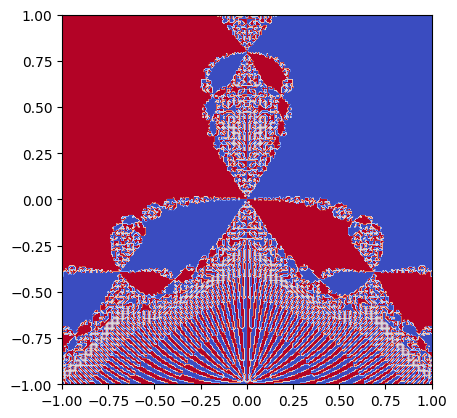

In [18]:
N = 300
x0 = np.linspace(-1,1,N)
y0 = np.linspace(-1,1,N)

Fractal= np.zeros((N,N),np.int64)

for i in range(len(x0)):
    for j in range(len(y0)):
        
        zn = np.array([x0[i],y0[j]])
        val = NewtonRaphson(zn,Fn,Jn)
        
        if val[1] > 0.01j:
            Fractal[i,j] = 20
        elif val[1] < -0.01j:
            Fractal[i,j] = 100
        elif val[1]<0.1j and val[1]>0.1j:
            Fractal[i,j] = 250

plt.imshow(Fractal, cmap="coolwarm" ,extent=[-1,1,-1,1])

# aprendizaje

1

In [21]:
f2 = lambda x,y: x**2 + y**2
Dx = lambda f,x,y,h=1e-5: (f(x+h,y) - f(x-h,y))/(2*h)
Dy = lambda f,x,y,h=1e-5: (f(x,y+h) - f(x,y-h))/(2*h)
Gradient = lambda f,x,y: np.array([Dx(f,x,y),Dy(f,x,y)])

def Minimizer(f, N = 200, gamma = 0.001):
    
    r = np.zeros((N,2))
    r[0] = np.array([0,3])
    
    Grad = np.zeros((N,2))
    Grad[0] = Gradient(f,r[0,0],r[0,1])
    
    # We save the gradient in each step

    for i in tqdm(range(1,N)):
        r[i] = r[i-1] - gamma*Gradient(f,r[i-1,0],r[i-1,1])
        Grad[i] = Gradient(f,r[i-1,0],r[i-1,1])
        
        
    return r,Grad

def Minimizer_momentum(f, N = 200, gamma = 0.001, n=0.6):
    
    r = np.zeros((N,2))
    r[0] = np.array([0,3])
    
    Grad = np.zeros((N,2))
    Grad[0] = Gradient(f,r[0,0],r[0,1])
    
    # We save the gradient in each step

    for i in tqdm(range(1,N)):
        r[i] = r[i-1] - gamma*Gradient(f,r[i-1,0],r[i-1,1])+n*(r[i-2]-r[i-3])
        Grad[i] = Gradient(f,r[i-1,0],r[i-1,1])
        
        
    return r,Grad


r1,Grad1 = Minimizer(f2)
r2,Grad2 = Minimizer_momentum(f2)

print(r1[-1])
print(r2[-1])
print(Grad1[-1])
print(Grad2[-1])


100%|██████████| 199/199 [00:00<00:00, 66190.84it/s]

[0.         2.01418321]
[0.        2.8098201]
[0.         4.03643929]
[0.        5.6483221]


3

In [22]:

#USANDO EL CÓDIGO PROPORCIONADO EN CLASE
#PUNTO 3

import numpy as np
from tqdm import tqdm


Dx = lambda f,x,h=1e-5: (f(x+h) - f(x-h))/(2*h)

def Minimizer(f, N=300, gamma=0.01):
    
    r = np.zeros(N)
    # Seed
    r[0] = np.random.uniform(-5,5)
    
    for i in tqdm(range(1,N)):
        r[i] = r[i-1] - gamma*Dx(f,r[i-1])
        
    return r

f= lambda x: np.abs(x-2)
x= Minimizer(f)


print(x[-1])

#Del resultado tenemos que oscila mucho y no se acerca al mínimo de la función


100%|██████████| 299/299 [00:00<?, ?it/s]

2.0035533335013724
